<a href="https://colab.research.google.com/github/pablosilvoni/calculo-area-python/blob/master/Reuters_Datset_multiclass_classification_Chollet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the Reuters dataset**

In [25]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


In [26]:
len(train_data)
len(test_data)


2246

In [27]:
train_data[10]


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

# **Decoding newswires back to text**

In [28]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [29]:
train_labels[10]

np.int64(3)

# **Encoding the data**

In [30]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# **One Hot Encoding (a mano)**

In [15]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# **One Hot Encoding built in Keras**

In [31]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# **Model definition**

In [32]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Hay dos aspectos adicionales que debe tener en cuenta sobre esta arquitectura:**

1. La red termina con una capa densa de tamaño 46. Esto significa que, para cada muestra de entrada, la red generará un vector de 46 dimensiones. Cada entrada de este vector (cada dimensión) codificará una clase de salida diferente.

2. La última capa utiliza una activación softmax. Este patrón se observó en el ejemplo de MNIST. Esto significa que la red generará una distribución de probabilidad sobre las 46 clases de salida diferentes: para cada muestra de entrada, la red generará un vector de salida de 46 dimensiones, donde output[i] es la probabilidad de que la muestra pertenezca a la clase i. Las 46 puntuaciones sumarán 1.

3. La mejor función de pérdida para usar en este caso es categorical_crossentropy. Esta mide la distancia entre dos distribuciones de probabilidad: en este caso, entre la distribución de probabilidad generada por la red y la distribución real de las etiquetas. Al minimizar la distancia entre estas dos distribuciones, se entrena la red para generar un resultado lo más cercano posible a las etiquetas reales.

# **Compiling the model**

In [33]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Setting aside a validation set**

In [34]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# **Training the model**

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.3843 - loss: 3.2755 - val_accuracy: 0.6050 - val_loss: 1.9522
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6450 - loss: 1.7422 - val_accuracy: 0.6770 - val_loss: 1.4227
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7266 - loss: 1.2532 - val_accuracy: 0.7300 - val_loss: 1.2179
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7755 - loss: 1.0236 - val_accuracy: 0.7630 - val_loss: 1.0933
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8148 - loss: 0.8481 - val_accuracy: 0.7760 - val_loss: 1.0321
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8568 - loss: 0.6778 - val_accuracy: 0.8010 - val_loss: 0.9467
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8856 - loss: 0.5580 - val_accuracy: 0.8140 - val_loss: 0.9089
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9067 - loss: 0.4757 - val_accuracy: 0.8150 - 

# **Plotting the training and validation loss**

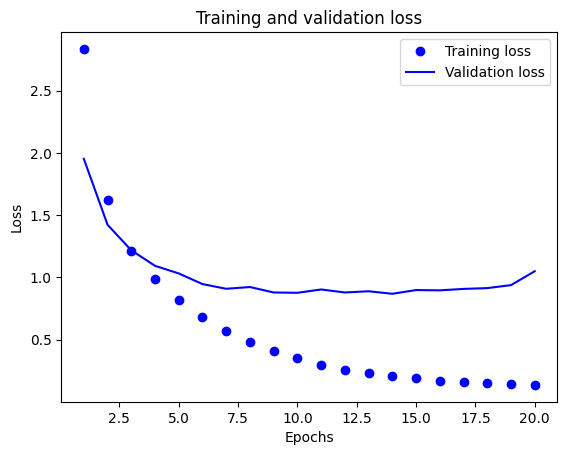

In [38]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

# **Plotting the training and validation accuracy**

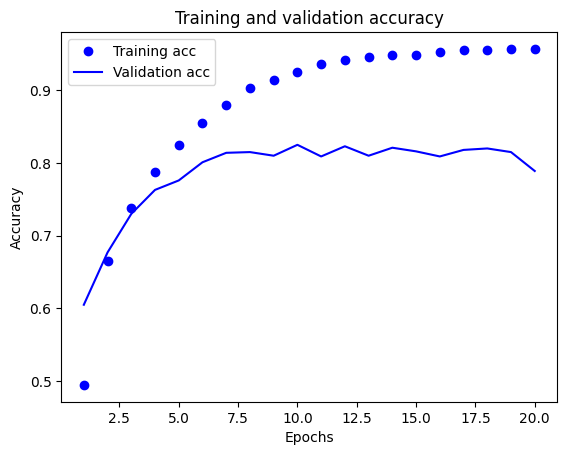

In [40]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

La red comienza a sobreajustarse después de nueve épocas. Entrenemos una nueva red desde cero durante nueve épocas y luego evalúemosla en el conjunto de prueba.

# **Retraining a model from scratch**

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3563 - loss: 3.1989 - val_accuracy: 0.6390 - val_loss: 1.8450
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6728 - loss: 1.6501 - val_accuracy: 0.6980 - val_loss: 1.3680
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7372 - loss: 1.2147 - val_accuracy: 0.7350 - val_loss: 1.1780
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7908 - loss: 0.9596 - val_accuracy: 0.7620 - val_loss: 1.0696
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8238 - loss: 0.8054 - val_accuracy: 0.7820 - val_loss: 0.9952
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.8531 - loss: 0.6710 - val_accuracy: 0.7790 - val_loss: 0.9869
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.8724 - loss: 0.5713 - val_accuracy: 0.7990 - val_loss: 0.9213
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9029 - loss: 0.4644 - val_accuracy: 0.8110 - val_loss:

In [42]:
results

[0.9440372586250305, 0.7880676984786987]

Este enfoque alcanza una precisión de aproximadamente el 80 %. En un problema de clasificación binaria balanceada, la precisión alcanzada por un clasificador puramente aleatorio sería del 50 %. Sin embargo, en este caso se acerca al 19 %, por lo que los resultados parecen bastante buenos, al menos en comparación con una línea base aleatoria.

In [52]:
import copy

In [53]:
test_labels_copy = copy.copy(test_labels)

In [54]:
np.random.shuffle(test_labels_copy)

In [55]:
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19011576135351738

# **Generating predictions for new data**

Podemos verificar que el método de predicción (predict) de la instancia del modelo devuelve una distribución de probabilidad para los 46 temas. Generemos predicciones de temas para todos los datos de prueba.

In [56]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [57]:
predictions[0].shape

(46,)

In [58]:
np.sum(predictions[0])

np.float32(1.0)

La entrada más grande es la clase prevista, la clase con la mayor probabilidad:

In [59]:
np.argmax(predictions[0])

np.int64(3)

# **A different way to handle the labels and the loss**